[9.99940631e+01 4.46125719e-06 5.75668324e-03 2.96789079e-03]


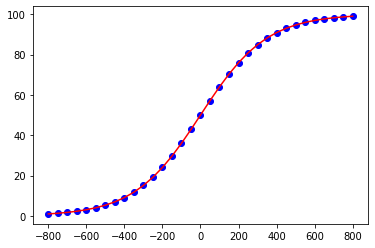

In [29]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)


xdata = range(-800,850,50)
ydata = [0.99,1.32,1.75,2.32,3.07,4.05,5.32,6.98,9.09,11.77,15.10,19.17,24.03,29.66,35.99,42.85,50.00,
        57.15,64.01,70.34,75.97,80.83,84.90,88.23,90.91,93.02,94.68,95.95,96.93,97.68,98.25,98.68,99.01]

p0 = [0,0,0,0]

popt, pcov = curve_fit(sigmoid, xdata, ydata, p0)

print(popt)

plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(xdata, sigmoid(xdata, *popt), 'r-')

In [40]:
diff = 100
print(sigmoid(diff, *popt))
print(100 / (1+10**(-diff/400)))

64.00617522143367
64.00649998028851


In [ ]:
#Shows graph of drawn games per elo level, per elo difference
#https://www.quora.com/Why-do-most-chess-games-between-grandmasters-end-in-draws

In [28]:
import numpy as np
from scipy.optimize import curve_fit

def func(X, a, b, c):
    x,y = X
    return a*x + b*y +c

# the draw table data
xdata = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300]
ydata = [1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,
    1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,
    1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,
    2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,
    2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,
    2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,
    2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600]
zdata = [21,24,25,24,24,22,23,24,22,22,20,20,21,19,18,17,
    28,29,30,29,27,27,27,26,25,25,23,22,20,20,20,19,
    31,32,32,32,30,30,28,27,26,25,23,23,22,22,20,20,
    35,35,34,33,32,31,30,29,27,25,25,24,21,21,19,19,
    42,42,40,39,37,36,34,32,30,28,25,24,22,20,19,17,
    54,53,51,50,47,45,41,38,35,33,30,26,24,22,19,18,
    57,54,54,52,51,50,45,42,40,37,34,31,30,28,29,25]

# initial guesses for a,b,c:
p0 = [0.2, 0.01, 20]
popt, pcov = curve_fit(func, (xdata,ydata), zdata, p0)
print(popt)

# calc mse for function
mse = 0
for i in range(len(xdata)):
    mse += (zdata[i] - func((xdata[i],ydata[i]), *popt))**2
print(mse)

[-0.07067227  0.01541295  9.57851891]
1819.7925157563025


In [27]:
import numpy as np
from scipy.optimize import curve_fit

def func(X, a, b, c, d, e):
    x,y = X
    return a*x**2 + b*x + c*y**2 + d*y + e

# some artificially noisy data to fit
xdata = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,
    0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300]
ydata = [1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,
    1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,
    1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,1800,
    2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,
    2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,2200,
    2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400,
    2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600]
zdata = [21,24,25,24,24,22,23,24,22,22,20,20,21,19,18,17,
    28,29,30,29,27,27,27,26,25,25,23,22,20,20,20,19,
    31,32,32,32,30,30,28,27,26,25,23,23,22,22,20,20,
    35,35,34,33,32,31,30,29,27,25,25,24,21,21,19,19,
    42,42,40,39,37,36,34,32,30,28,25,24,22,20,19,17,
    54,53,51,50,47,45,41,38,35,33,30,26,24,22,19,18,
    57,54,54,52,51,50,45,42,40,37,34,31,30,28,29,25]

# initial guesses for a,b,c:
p0 = [0,0,0,0,0]
popt, pcov = curve_fit(func, (xdata,ydata), zdata, p0)
print(popt)

# calc mse for function
mse = 0
for i in range(len(xdata)):
    mse += (zdata[i] - func((xdata[i],ydata[i]), *popt))**2
print(mse)

[-5.47719190e-05 -5.42406932e-02  9.95163600e-06 -2.43935975e-02
  4.70259943e+01]
1587.6354091636697
